Deskripsi Dataset Titanic:

Dataset Titanic adalah kumpulan data historis yang menyediakan informasi terperinci tentang penumpang yang berada di kapal RMS Titanic, kapal penumpang yang tenggelam pada tahun 1912 setelah bertabrakan dengan gunung es.

Setiap entri dalam dataset ini menjelaskan seorang penumpang individu dan mencakup atribut seperti:

*  **Survived: Variabel target utama** yang menunjukkan apakah penumpang selamat (1) atau tidak (0) dari bencana.
*   Pclass: Kelas tiket penumpang, yang mencerminkan status sosial dan ekonomi.
*   Sex: Jenis kelamin penumpang.
*   Age: Usia penumpang.
*  SibSp: Jumlah saudara kandung atau pasangan yang ikut serta dalam perjalanan.
*   Parch: Jumlah orang tua atau anak-anak yang bersama penumpang
*   Fare: Harga tiket.
*   Embarked: Pelabuhan keberangkatan penumpang.


# **Import Basic Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler


# **Import Dataset**

In [ ]:
df_titanic = pd.read_csv("/content/titanic_train.csv")
df_titanic.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Drop Unrelevant Variables


In [ ]:
df_new = df_titanic.drop(['Name', 'Ticket', 'Cabin', 'PassengerId'], axis=1)
df_new.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


# **Exploration**

### Check Data Types

In [ ]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


### Check Data Missing Values

In [ ]:
missing_values = df_new.isna().sum()
print(missing_values)


Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64


### Check Skewness

In [ ]:
skewness = df_new.skew()

print(skewness)


Survived    0.478523
Pclass     -0.630548
Age         0.389108
SibSp       3.695352
Parch       2.749117
Fare        4.787317
dtype: float64


<ipython-input-9-bfd239d15905>:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  skewness = df_new.skew()


* Untuk 'Age' dengan skewness 0.389108, yang sedikit miring ke kanan, bisa menggunakan median untuk imputasi karena lebih tahan terhadap outlier.

* Untuk 'Embarked', yang merupakan data kategorikal, gunakan modus (nilai
yang paling sering muncul) untuk imputasi.

### Unique Value Analysis

In [ ]:
print(df_new["Sex"].unique())

['male' 'female']


In [ ]:
print(df_new["Embarked"].unique())

['S' 'C' 'Q' nan]


### Categorical Comparison

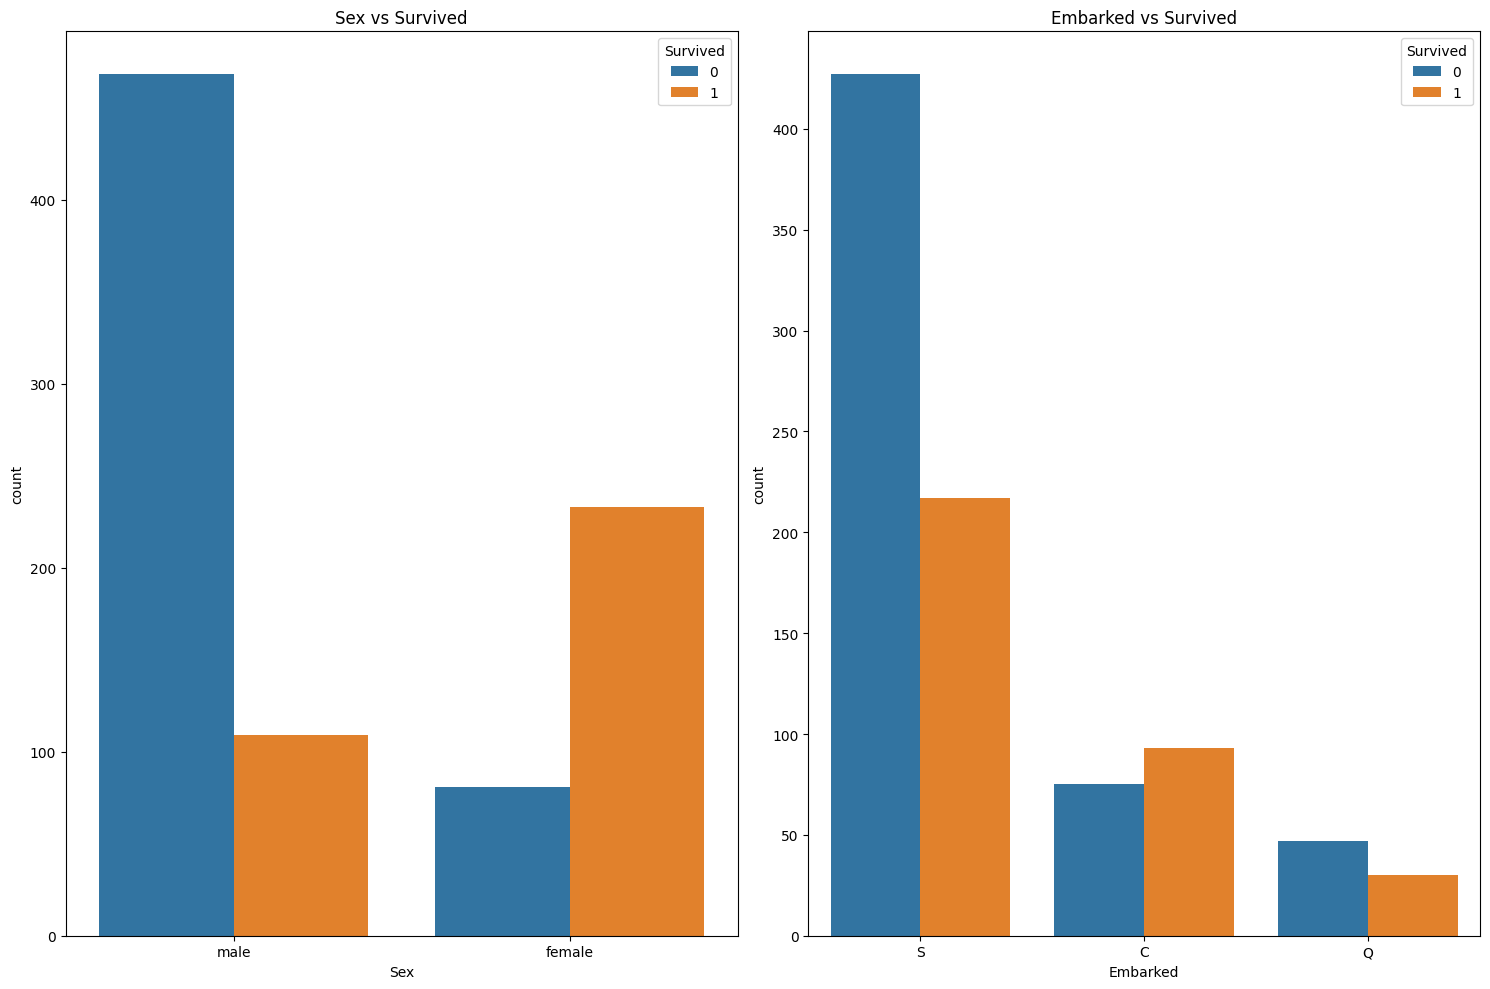

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(15, 10))

sns.countplot(x='Sex', hue='Survived', data=df_new, ax=axs[0])
sns.countplot(x='Embarked', hue='Survived', data=df_new, ax=axs[1])

axs[0].set_title('Sex vs Survived')
axs[1].set_title('Embarked vs Survived')

plt.tight_layout()
plt.show()


### Box Plot

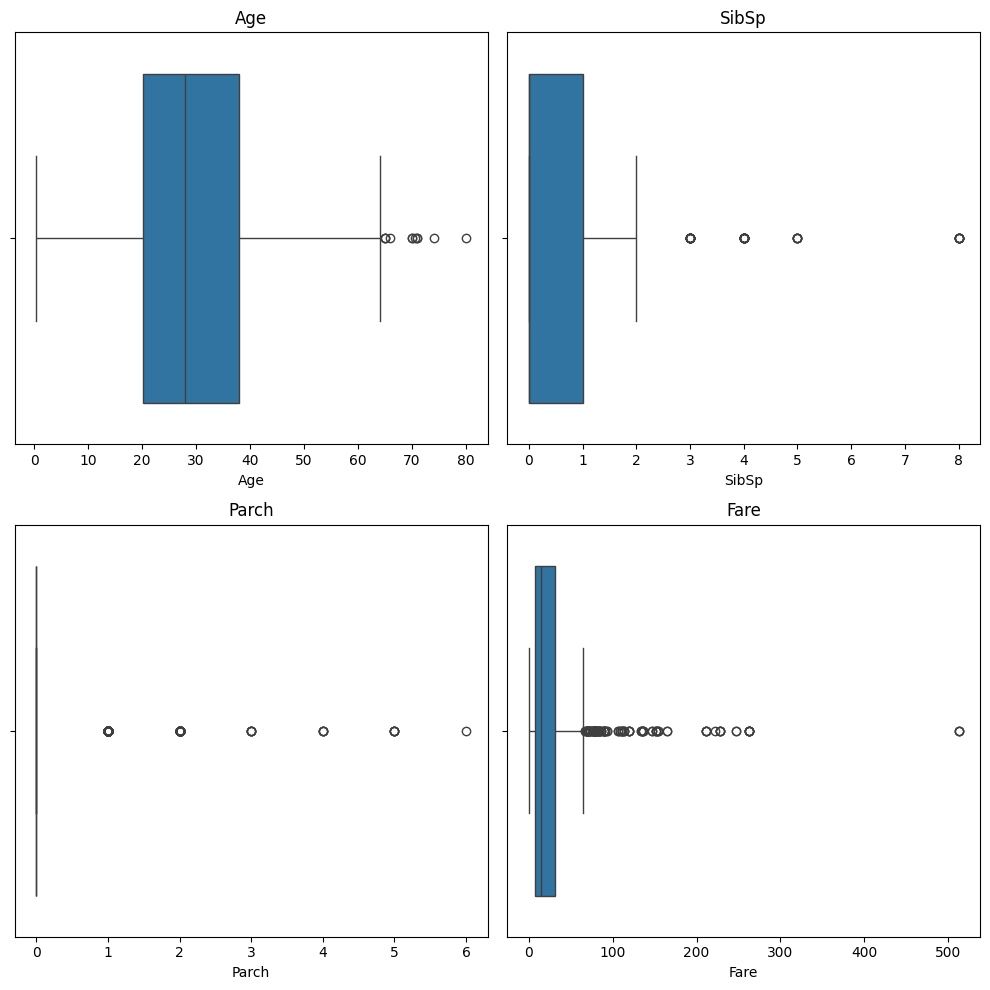

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10))


sns.boxplot(x='Age', data=df_titanic, ax=axs[0, 0])
sns.boxplot(x='SibSp', data=df_titanic, ax=axs[0, 1])
sns.boxplot(x='Parch', data=df_titanic, ax=axs[1, 0])
sns.boxplot(x='Fare', data=df_titanic, ax=axs[1, 1])


axs[0, 0].set_title('Age')
axs[0, 1].set_title('SibSp')
axs[1, 0].set_title('Parch')
axs[1, 1].set_title('Fare')

plt.tight_layout()
plt.show()


### Count Plot

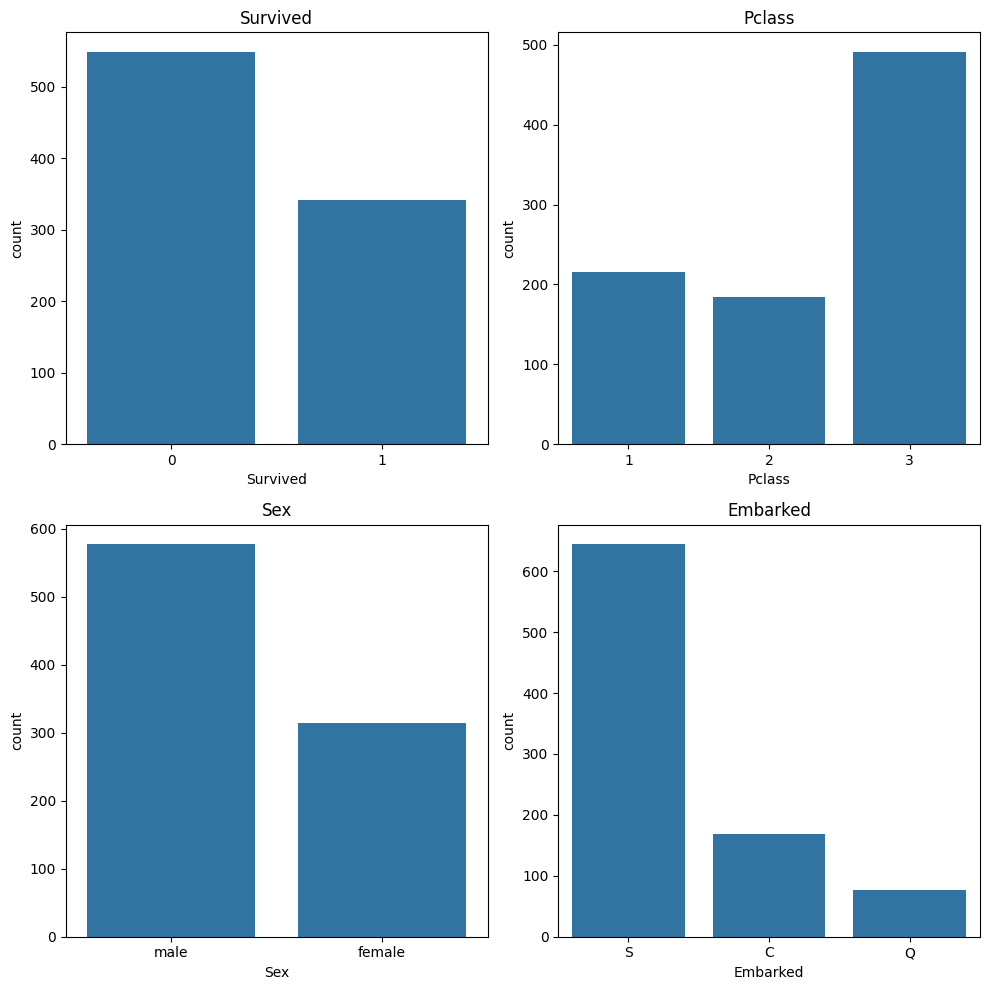

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

sns.countplot(x='Survived', data=df_titanic, ax=axs[0, 0])
sns.countplot(x='Pclass', data=df_titanic, ax=axs[0, 1])
sns.countplot(x='Sex', data=df_titanic, ax=axs[1, 0])
sns.countplot(x='Embarked', data=df_titanic, ax=axs[1, 1])

axs[0, 0].set_title('Survived')
axs[0, 1].set_title('Pclass')
axs[1, 0].set_title('Sex')
axs[1, 1].set_title('Embarked')

plt.tight_layout()
plt.show()


### Histogram

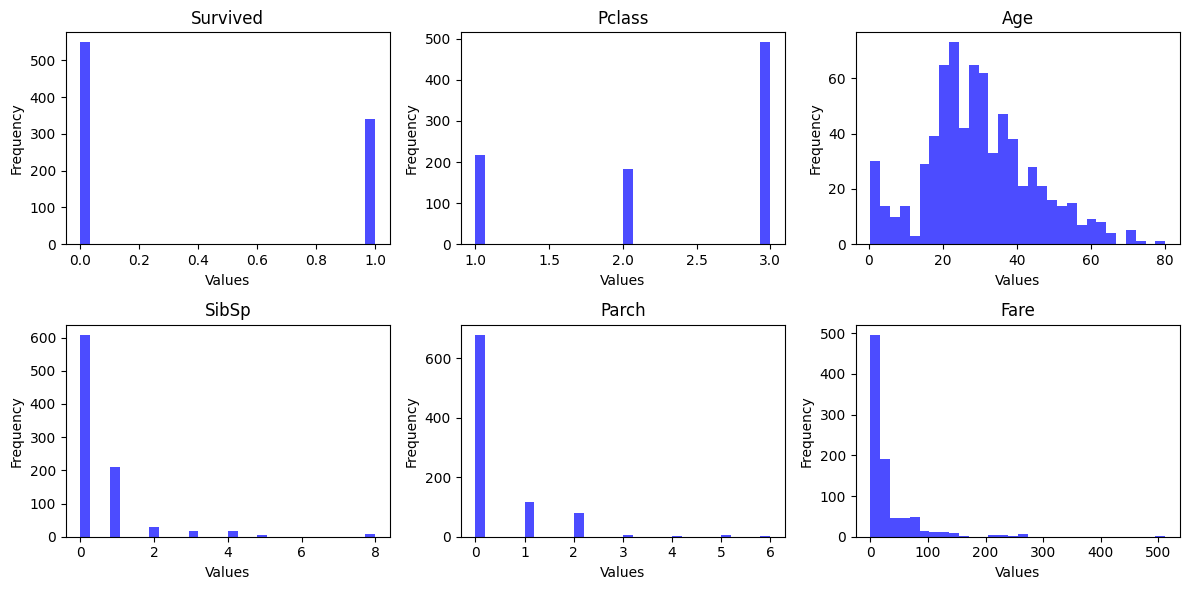

In [ ]:
num_col_test = df_new.select_dtypes(include='number').columns.to_list()
fig, axes = plt.subplots(2, 3, figsize=(12,6))
axes = axes.flatten()
for i, column in enumerate(num_col_test):
    ax = axes[i]
    ax.hist(df_new[column], bins=30, color='blue', alpha=0.7)
    ax.set_title(column)
    ax.set_xlabel('Values')
    ax.set_ylabel('Frequency')

plt.tight_layout()

### Handling Missing Values with Imputation

In [ ]:
from sklearn.impute import SimpleImputer
import pandas as pd


imputer_age = SimpleImputer(missing_values=np.nan, strategy='median')
df_new['Age'] = imputer_age.fit_transform(df_new[['Age']])

imputer_embarked = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
df_new['Embarked'] = imputer_embarked.fit_transform(df_new[['Embarked']])

print(df_new.isnull().sum())


Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64


#  **Transformation**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler


# Transformasi logaritmik untuk 'SibSp' dan 'Parch' untuk mengurangi skewness dan outlier
df_new['SibSp_log'] = np.log1p(df_new['SibSp'])
df_new['Parch_log'] = np.log1p(df_new['Parch'])

# Z-score normalization untuk 'Age'
scaler = StandardScaler()
df_new['Age_z_score'] = scaler.fit_transform(df_new[['Age']])

# Transformasi logaritmik untuk 'Fare' untuk mengurangi skewness dan outlier
df_new['Fare_log'] = np.log1p(df_new['Fare'])  # log1p digunakan untuk menghindari log(0)

# Min-max normalization untuk 'SibSp_log' dan 'Parch_log'
min_max_scaler = MinMaxScaler()
df_new['SibSp_log_min_max'] = min_max_scaler.fit_transform(df_new[['SibSp_log']])
df_new['Parch_log_min_max'] = min_max_scaler.fit_transform(df_new[['Parch_log']])

df_new.drop(['SibSp', 'Parch'], axis=1, inplace=True)

print(df_new[['Age_z_score', 'Fare_log', 'SibSp_log_min_max', 'Parch_log_min_max']].head())


   Age_z_score  Fare_log  SibSp_log_min_max  Parch_log_min_max
0    -0.565736  2.110213           0.315465                0.0
1     0.663861  4.280593           0.315465                0.0
2    -0.258337  2.188856           0.000000                0.0
3     0.433312  3.990834           0.315465                0.0
4     0.433312  2.202765           0.000000                0.0


### Dummy Variabel Creation

In [ ]:
df_new_dummy = pd.get_dummies(df_new, columns=["Sex", "Embarked"], prefix=["Sex", "Embarked"], drop_first=True)

df_new_dummy.head()

,Survived,Pclass,Age,Fare,Age_z_score,Fare_log,FamilySize,FamilySize_min_max,SibSp_log,Parch_log,SibSp_log_min_max,Parch_log_min_max,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,7.2500,-0.565736,2.110213,2,0.1,0.693147,0.0,0.315465,0.0,1,0,1
1,1,1,38.0,71.2833,0.663861,4.280593,2,0.1,0.693147,0.0,0.315465,0.0,0,0,0
2,1,3,26.0,7.9250,-0.258337,2.188856,1,0.0,0.000000,0.0,0.000000,0.0,0,0,1
3,1,1,35.0,53.1000,0.433312,3.990834,2,0.1,0.693147,0.0,0.315465,0.0,0,0,1
4,0,3,35.0,8.0500,0.433312,2.202765,1,0.0,0.000000,0.0,0.000000,0.0,1,0,1


### Dummy Variabel Creation with One Hot Encoding

In [ ]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False)

encoded_columns = encoder.fit_transform(df_new[['Sex', 'Embarked']])

encoded_df = pd.DataFrame(encoded_columns, columns=encoder.get_feature_names_out(['Sex', 'Embarked']))

df_new.reset_index(drop=True, inplace=True)
encoded_df.reset_index(drop=True, inplace=True)

df_new_dummy = pd.concat([df_new, encoded_df], axis=1)

df_new_dummy.drop(['Sex', 'Embarked'], axis=1, inplace=True)

df_new_dummy.head()


,Survived,Pclass,Age,Fare,Age_z_score,Fare_log,FamilySize,FamilySize_min_max,SibSp_log,Parch_log,SibSp_log_min_max,Parch_log_min_max,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,7.2500,-0.565736,2.110213,2,0.1,0.693147,0.0,0.315465,0.0,0.0,1.0,0.0,0.0,1.0
1,1,1,38.0,71.2833,0.663861,4.280593,2,0.1,0.693147,0.0,0.315465,0.0,1.0,0.0,1.0,0.0,0.0
2,1,3,26.0,7.9250,-0.258337,2.188856,1,0.0,0.000000,0.0,0.000000,0.0,1.0,0.0,0.0,0.0,1.0
3,1,1,35.0,53.1000,0.433312,3.990834,2,0.1,0.693147,0.0,0.315465,0.0,1.0,0.0,0.0,0.0,1.0
4,0,3,35.0,8.0500,0.433312,2.202765,1,0.0,0.000000,0.0,0.000000,0.0,0.0,1.0,0.0,0.0,1.0


# **Data Reduction (Principal Component Analisis)**

In [ ]:
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np

n_samples, n_features = X_imputed.shape
n_components = min(n_samples, n_features)


pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_imputed)

explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

desired_variance = 0.95
components_for_desired_variance = np.argmax(cumulative_variance_ratio >= desired_variance) + 1

print("Explained Variance Ratio by Component:\n", explained_variance_ratio)
print("\nCumulative Explained Variance by Component:\n", cumulative_variance_ratio)
print("\nNumber of Components to Retain 95% Variance:", components_for_desired_variance)


Explained Variance Ratio by Component:
 [9.34162249e-01 6.38439163e-02 1.35070262e-03 2.18668740e-04
 1.87674363e-04 9.32889043e-05 6.78490331e-05 5.50781803e-05
 1.73311062e-05 3.24152588e-06 1.59639879e-34]

Cumulative Explained Variance by Component:
 [0.93416225 0.99800617 0.99935687 0.99957554 0.99976321 0.9998565
 0.99992435 0.99997943 0.99999676 1.         1.        ]

Number of Components to Retain 95% Variance: 2


# **Hasil Interpretasi:**

1. **Explained Variance Ratio by Component**:
   - Komponen pertama (PC1) menjelaskan 93.41% dari varians total dalam data. Ini menunjukkan bahwa sebagian besar informasi dalam dataset dapat dijelaskan oleh PC1.
   - Komponen kedua (PC2) menambahkan sekitar 6.38% penjelasan varians, sehingga total varians yang dijelaskan oleh dua komponen pertama adalah sekitar 99.80%.
   - Komponen berikutnya memberikan kontribusi yang sangat kecil dalam menjelaskan varians yang tersisa.

2. **Cumulative Explained Variance by Component**:
   - Nilai ini menunjukkan penjumlahan berturut-turut dari rasio varians yang dijelaskan. Misalnya, dua komponen pertama (PC1 dan PC2) secara kolektif menjelaskan sekitar 99.80% dari total varians dalam data Anda.
   - Komponen tambahan setelah PC2 hanya menambahkan sedikit penjelasan tambahan ke varians total (sehingga mencapai 100%).

3. **Number of Components to Retain 95% Variance: 2**:
   - Untuk menjelaskan setidaknya 95% dari varians total dalam data, hanya perlu dua komponen utama. Ini berarti dengan hanya menggunakan PC1 dan PC2, dapat mempertahankan sebagian besar informasi yang ada dalam dataset asli tanpa kehilangan banyak detail.
